## Kaggle: PML_03_Medical Appointment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
%matplotlib inline

*raw data link: https://www.kaggle.com/joniarroba/noshowappointments*

## 1. Load data

### 1.1 load csv file

In [2]:
appoint = pd.read_csv("./data/KaggleV2-May-2016.csv", parse_dates = ['ScheduledDay','AppointmentDay'], \
                  index_col='AppointmentID',  infer_datetime_format=True)

# drop PatientId 
appoint.drop('PatientId', axis=1, inplace=True)
appoint.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,
5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
appoint.shape

(110527, 12)

### 1.2 Discriptive Statistics

#### 1.2.1 Overall of dataset

In [4]:
appoint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 5642903 to 5629448
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 11.0+ MB


In [5]:
num_lst = appoint.columns[appoint.dtypes == 'int64']
cat_lst = appoint.columns[appoint.dtypes == 'object']
dat_lst = appoint.columns[appoint.dtypes == 'datetime64[ns]']
print(*num_lst, '\n', *cat_lst, '\n', *dat_lst)

Age Scholarship Hipertension Diabetes Alcoholism Handcap SMS_received 
 Gender Neighbourhood No-show 
 ScheduledDay AppointmentDay


#### 1.2.2 check missing values
*These is no missing values in the dataset*

In [6]:
appoint.count().sort_values() / appoint.shape[0] 

Gender            1.0
ScheduledDay      1.0
AppointmentDay    1.0
Age               1.0
Neighbourhood     1.0
Scholarship       1.0
Hipertension      1.0
Diabetes          1.0
Alcoholism        1.0
Handcap           1.0
SMS_received      1.0
No-show           1.0
dtype: float64

## 2. EDA

#### 2.1 check numeric columns

In [7]:
appoint.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11745b2e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1198f0390>]], dtype=object)

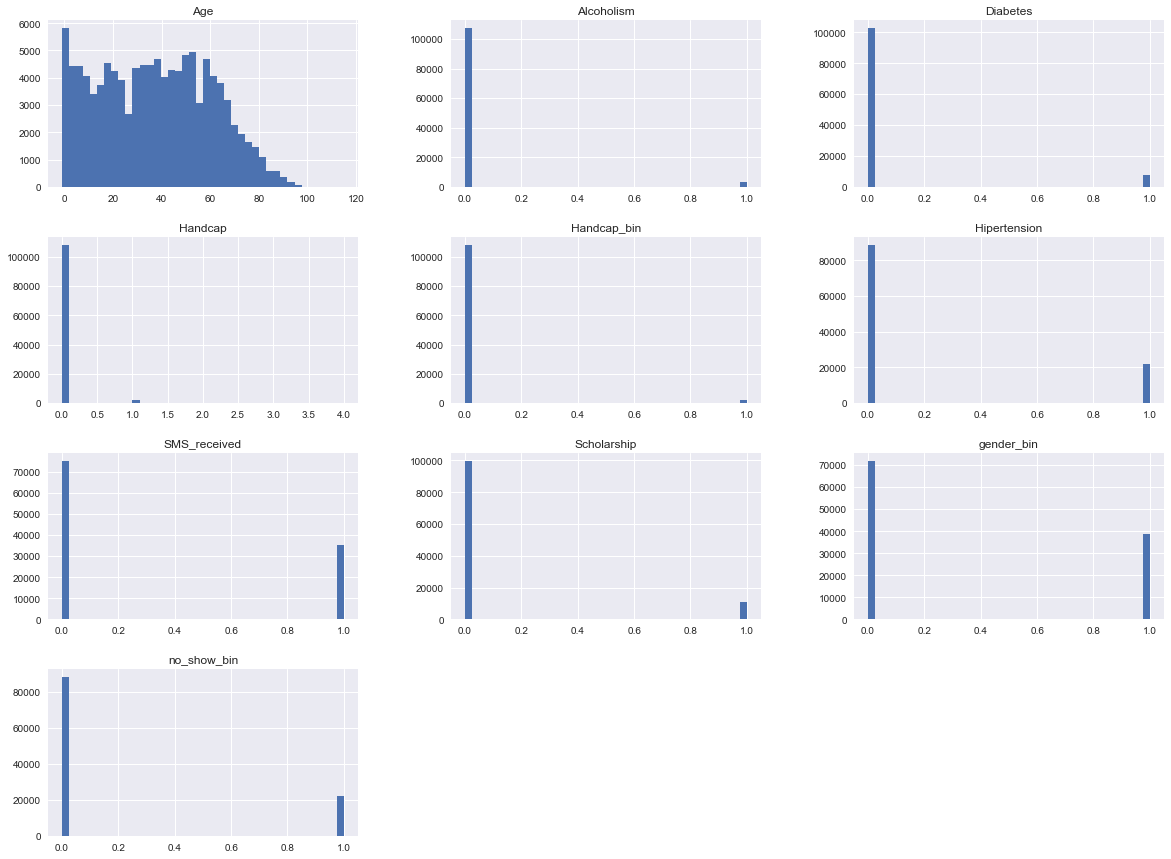

In [28]:
appoint.hist(bins = 40, figsize =(20,15))

*seems many variables are binary, so need stritified samples splitting*

#### 2.2 check categorical variables

In [9]:
# 1. binary handcap 
appoint.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [20]:
# add new col Handcap_bin, 1 has handcap, 0 has no handcap.
appoint.loc[appoint.Handcap == 0, 'Handcap_bin'] = 0
appoint.loc[appoint.Handcap != 0, 'Handcap_bin'] = 1
appoint.Handcap_bin.value_counts()
appoint.Handcap_bin = appoint.Handcap_bin.astype(int)

In [25]:
# 2. Gender & no-show
print(appoint.Gender.value_counts()/len(appoint))
print(appoint['No-show'].value_counts()/len(appoint))

F    0.649977
M    0.350023
Name: Gender, dtype: float64
No     0.798067
Yes    0.201933
Name: No-show, dtype: float64


In [16]:
# 3. binary of gender and no-show
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
appoint['gender_bin'] = lb.fit_transform(appoint.Gender)
appoint['no_show_bin'] = lb.fit_transform(appoint['No-show'])

print(appoint.gender_bin.value_counts())
print(appoint.no_show_bin.value_counts())

0    71840
1    38687
Name: gender_bin, dtype: int64
0    88208
1    22319
Name: no_show_bin, dtype: int64


In [21]:
appoint.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Handcap_bin,no_show_bin,gender_bin
AppointmentID,,,,,,,,,,,,,,,
5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0,0
5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0,1
5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0,0
5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0,0
5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0,0


In [27]:
# 4. Neighboourhood
neigh = appoint.Neighbourhood.value_counts()
print(neigh.shape)
print(neigh.head())

(81,)
JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: Neighbourhood, dtype: int64


In [350]:
print(appoint.SMS_received.value_counts()/len(appoint))

0    0.678974
1    0.321026
Name: SMS_received, dtype: float64


#### 2.3 check the correlations

In [39]:
feature_cor = [13, 0,3,5,6,7,8,10,12,14]
appoint_cor = appoint.ix[:, feature_cor]
appoint_cor.corr()

,no_show_bin,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Handcap_bin,gender_bin
no_show_bin,1.000000,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,0.126431,-0.007281,-0.004119
Age,-0.060319,1.000000,-0.092457,0.504586,0.292391,0.095811,0.012643,0.083743,-0.106440
Scholarship,0.029135,-0.092457,1.000000,-0.019729,-0.024894,0.035022,0.001194,-0.009103,-0.114293
Hipertension,-0.035701,0.504586,-0.019729,1.000000,0.433086,0.087971,-0.006267,0.084852,-0.055718
Diabetes,-0.015180,0.292391,-0.024894,0.433086,1.000000,0.018474,-0.014550,0.059145,-0.032554
Alcoholism,-0.000196,0.095811,0.035022,0.087971,0.018474,1.000000,-0.026147,0.003692,0.106167
SMS_received,0.126431,0.012643,0.001194,-0.006267,-0.014550,-0.026147,1.000000,-0.025220,-0.046298
Handcap_bin,-0.007281,0.083743,-0.009103,0.084852,0.059145,0.003692,-0.025220,1.000000,0.022422
gender_bin,-0.004119,-0.106440,-0.114293,-0.055718,-0.032554,0.106167,-0.046298,0.022422,1.000000


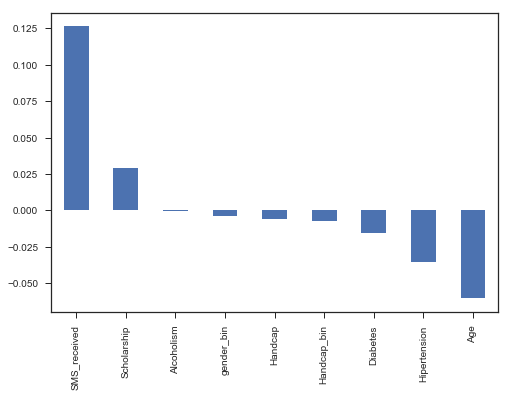

In [49]:
appoint.corr().no_show_bin.sort_values(ascending=False)[1:].plot(kind='bar')

*SMS_received has high positive correlation with no_show, while age has negative correlation*

In [8]:
appoint.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'Handcap_bin', 'gender_bin', 'no_show_bin',
       'dt_year', 'dt_month', 'dt_day', 'dt_week', 'dt_weekday', 'day_diff'],
      dtype='object')

##### visualization regarding the age and no_show

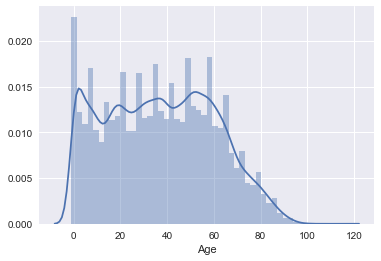

In [40]:
#sns.kdeplot(appoint.Age, shade=True)
sns.distplot(appoint.Age)

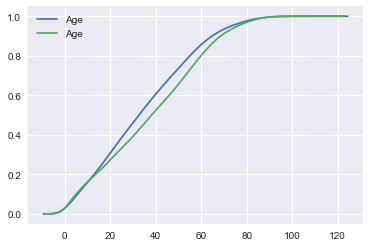

In [45]:
sns.kdeplot(appoint.loc[appoint.no_show_bin==1, 'Age'], cumulative=True )
sns.kdeplot(appoint.loc[appoint.no_show_bin==0, 'Age'], cumulative=True )

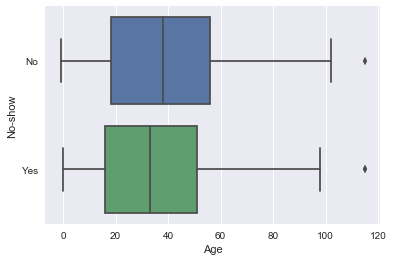

In [36]:
sns.boxplot(appoint.Age, appoint['No-show'])

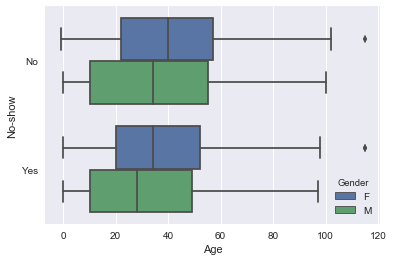

In [28]:
sns.boxplot(appoint.Age,  appoint['No-show'], hue =appoint.Gender)

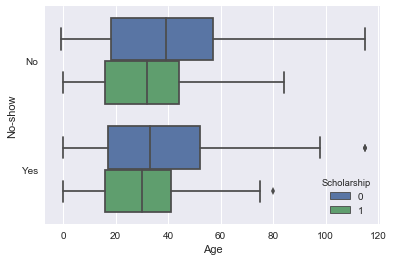

In [29]:
sns.boxplot(appoint.Age, appoint['No-show'], hue = appoint.Scholarship)

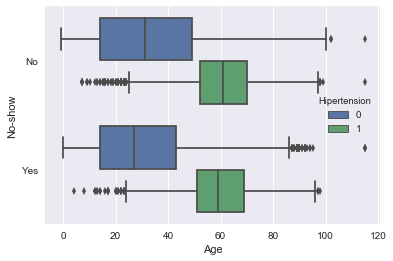

In [30]:
sns.boxplot(appoint.Age, appoint['No-show'], hue = appoint.Hipertension)

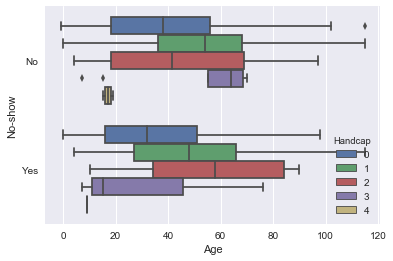

In [27]:
sns.boxplot(appoint.Age, appoint['No-show'], hue = appoint.Handcap)

##### visualization regarding the SMS_received and no_show

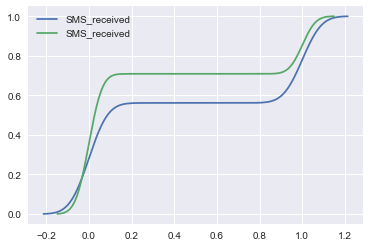

In [49]:
sns.kdeplot(appoint.loc[appoint.no_show_bin==1, 'SMS_received'], cumulative=True )
sns.kdeplot(appoint.loc[appoint.no_show_bin==0, 'SMS_received'], cumulative=True )

#### 2.4 check datetime variable
*sometime wrong with record at 2015-5-14

2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64


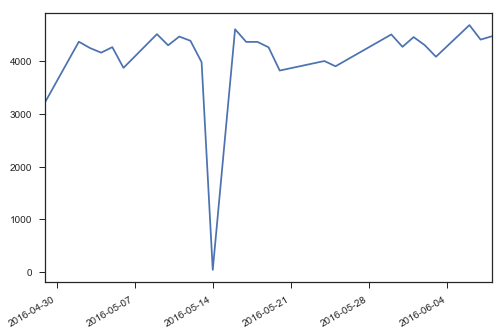

In [53]:
p = appoint.AppointmentDay.value_counts()
print(p.tail())
p.plot()

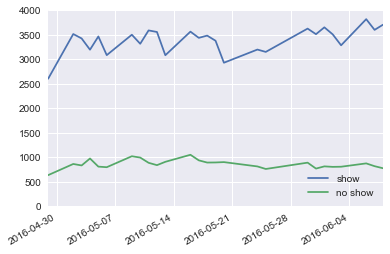

In [76]:
# remove the 2015-05-14
'no_show_bin', .loc[(appoint.No_show == 0) & (appoint.AppointmentDay != '2016-05-14')].AppointmentDay.value_counts().plot(label='show')
appoint.loc[(appoint.No_show == 1) & (appoint.AppointmentDay != '2016-05-14')].AppointmentDay.value_counts().plot(label='no show')
plt.legend(loc="lower right", fontsize=10)
plt.ylim(0,4000)
plt.show()

In [134]:
# create weekday column
import datetime as dt
appoint_date = appoint[['ScheduledDay','AppointmentDay', 'no_show_bin']].copy()
#ad = appoint_date['AppointmentDay'].dt.strftime('%Y-%m-%d')

appoint['dt_year'] = appoint_date.AppointmentDay.dt.year
appoint['dt_month'] = appoint_date.AppointmentDay.dt.month
appoint['dt_day'] = appoint_date.AppointmentDay.dt.day
appoint['dt_week'] = appoint_date.AppointmentDay.dt.week
appoint['dt_weekday'] = appoint_date.AppointmentDay.dt.weekday

In [135]:
appoint.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Handcap_bin,no_show_bin,gender_bin,dt_year,dt_month,dt_day,dt_week,dt_weekday
AppointmentID,,,,,,,,,,,,,,,,,,,,
5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0,0,2016,4,29,17,4
5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0,1,2016,4,29,17,4
5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0,0,2016,4,29,17,4
5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0,0,2016,4,29,17,4
5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0,0,2016,4,29,17,4


In [217]:
df = appoint.groupby(['dt_weekday', 'no_show_bin']).count().Age.unstack()
df['total'] = df.sum(axis=1)
df.reset_index()

no_show_bin,dt_weekday,0,1,total
0,0,18025,4690,22715
1,1,20488,5152,25640
2,2,20774,5093,25867
3,3,13909,3338,17247
4,4,14982,4037,19019
5,5,30,9,39


In [153]:
appoint['day_diff'] = appoint_date.AppointmentDay.dt.day - appoint_date.ScheduledDay.dt.day
appoint.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,No-show,Handcap_bin,no_show_bin,gender_bin,dt_year,dt_month,dt_day,dt_week,dt_weekday,day_diff
AppointmentID,,,,,,,,,,,,,,,,,,,,,
5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,...,No,0,0,0,2016,4,29,17,4,0
5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,...,No,0,0,1,2016,4,29,17,4,0
5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,...,No,0,0,0,2016,4,29,17,4,0
5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,...,No,0,0,0,2016,4,29,17,4,0
5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,...,No,0,0,0,2016,4,29,17,4,0


In [151]:
#appoint.drop(['diff', 'day_diff'], axis=1, inplace=True)

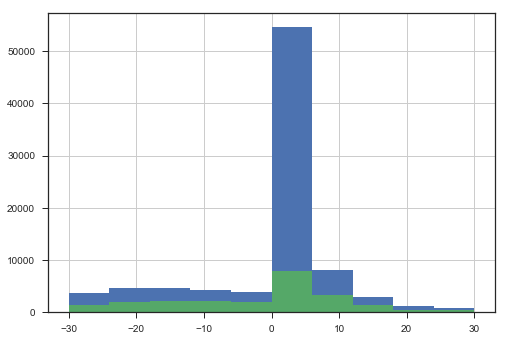

In [186]:
appoint.loc[appoint.no_show_bin == 0, 'day_diff'].hist()
appoint.loc[appoint.no_show_bin == 1, 'day_diff'].hist()
plt.show()

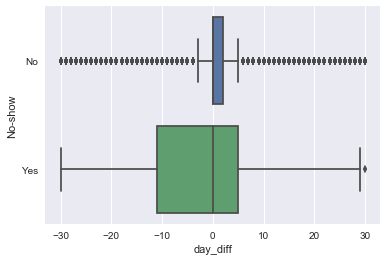

In [56]:
sns.boxplot(appoint.day_diff, appoint['No-show'])

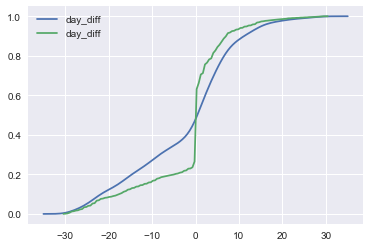

In [57]:
sns.kdeplot(appoint.loc[appoint.no_show_bin==1, 'day_diff'], cumulative=True )
sns.kdeplot(appoint.loc[appoint.no_show_bin==0, 'day_diff'], cumulative=True )

##### more visualization regarding the  date and no_show

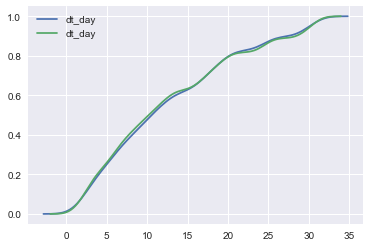

In [60]:
sns.kdeplot(appoint.loc[appoint.no_show_bin==1, 'dt_day'], cumulative=True )
sns.kdeplot(appoint.loc[appoint.no_show_bin==0, 'dt_day'], cumulative=True )

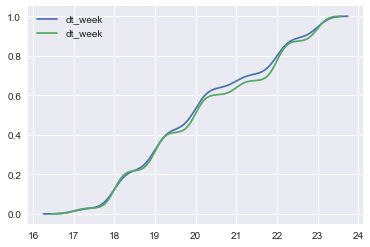

In [61]:
sns.kdeplot(appoint.loc[appoint.no_show_bin==1, 'dt_week'], cumulative=True )
sns.kdeplot(appoint.loc[appoint.no_show_bin==0, 'dt_week'], cumulative=True )

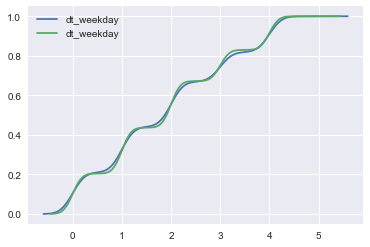

In [62]:
sns.kdeplot(appoint.loc[appoint.no_show_bin==1, 'dt_weekday'], cumulative=True )
sns.kdeplot(appoint.loc[appoint.no_show_bin==0, 'dt_weekday'], cumulative=True )

## 3. Prepare the data for modeling

#### 3.1 preprocessing and select the attributes

In [2]:
def preproc_attr(data):
    # handcap binary
    data.loc[appoint.Handcap == 0, 'Handcap_bin'] = 0
    data.loc[appoint.Handcap != 0, 'Handcap_bin'] = 1
    data.Handcap_bin = appoint.Handcap_bin.astype(int)
    
    # gender, no_show binary
    from sklearn.preprocessing import LabelBinarizer
    lb = LabelBinarizer()
    data['gender_bin'] = lb.fit_transform(data.Gender)
    data['no_show_bin'] = lb.fit_transform(data['No-show'])
    
    # convert date
    import datetime as dt
    data['dt_year'] = data.AppointmentDay.dt.year
    data['dt_month'] = data.AppointmentDay.dt.month
    data['dt_day'] = data.AppointmentDay.dt.day
    data['dt_week'] = data.AppointmentDay.dt.week
    data['dt_weekday'] = data.AppointmentDay.dt.weekday
    
    # add day_diff
    data['day_diff'] = data.AppointmentDay.dt.day - data.ScheduledDay.dt.day
    
    return data




In [3]:
appoint = pd.read_csv("./data/KaggleV2-May-2016.csv", parse_dates = ['ScheduledDay','AppointmentDay'], \
                  index_col='AppointmentID',  infer_datetime_format=True)

# drop PatientId 
appoint.drop('PatientId', axis=1, inplace=True)
appoint = preproc_attr(appoint)
appoint.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,No-show,Handcap_bin,gender_bin,no_show_bin,dt_year,dt_month,dt_day,dt_week,dt_weekday,day_diff
AppointmentID,,,,,,,,,,,,,,,,,,,,,
5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,...,No,0,0,0,2016,4,29,17,4,0
5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,...,No,0,1,0,2016,4,29,17,4,0
5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,...,No,0,0,0,2016,4,29,17,4,0


In [4]:
appoint.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'Handcap_bin', 'gender_bin', 'no_show_bin',
       'dt_year', 'dt_month', 'dt_day', 'dt_week', 'dt_weekday', 'day_diff'],
      dtype='object')

In [150]:
X = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 
         'Handcap_bin', 'gender_bin', 'day_diff']


#X = ['Age', 'Scholarship',  'SMS_received', 'Hipertension','day_diff']
y = 'no_show_bin'

#### 3.2 Train_test_split

In [151]:
from sklearn.model_selection import train_test_split

# define the test_size, setup the random_state
X_train, X_test, y_train, y_test = train_test_split(appoint[X], appoint[y], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(88421, 9) (22106, 9) (88421,) (22106,)


In [152]:
X_train.head(10)

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Handcap_bin,gender_bin,day_diff
AppointmentID,,,,,,,,,
5687610,25,0,0,0,0,0,0,0,8
5694484,62,0,0,0,0,0,0,1,4
5500939,65,0,0,0,0,0,0,0,-13
5639080,41,0,0,0,0,0,0,1,0
5671566,61,0,1,0,1,0,0,1,3
5600056,11,1,0,0,0,0,0,0,-3
5640931,45,0,0,0,0,1,0,1,-25
5730450,9,0,0,0,0,1,0,1,-17
5771325,79,0,0,0,0,0,0,1,0


#### 3.3 Feature selection

##### check overall the variance in dataset

In [153]:
np.var(X_train, 0)

Age             533.803605
Scholarship       0.089383
Hipertension      0.158835
Diabetes          0.067094
Alcoholism        0.029699
SMS_received      0.218157
Handcap_bin       0.019943
gender_bin        0.227590
day_diff        106.687153
dtype: float64

##### Removing Features with Low Variance

In [154]:
import sklearn.feature_selection as fs
X_train_new = fs.VarianceThreshold(threshold = 1).fit_transform(X_train)

print(X_train_new[0])
print(X_train.iloc[0])
print('select Age and day_diff')

[25  8]
Age             25
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
SMS_received     0
Handcap_bin      0
gender_bin       0
day_diff         8
Name: 5687610, dtype: int64
select Age and day_diff


##### Univariate Feature Selection

- Function chi2 is used to perform a  $χ^2$  test
- Function f_classifier is used to perform an  F  test for classification problems

In [155]:
X_train.day_diff = X_train.day_diff + 30


In [161]:

chi_2 = fs.chi2(X_train, y_train)
chi_2_df = pd.DataFrame(chi_2[0], X , columns=['Chi_2'])
chi_2_df['p_value'] = chi_2[1]
chi_2_df.sort_values('Chi_2', ascending=False, inplace=True)
chi_2_df

,Chi_2,p_value
Age,4373.581623,0.000000e+00
SMS_received,1012.398155,3.625521e-222
day_diff,507.504570,2.213867e-112
Hipertension,84.898833,3.140285e-20
Scholarship,70.796822,3.959744e-17
Diabetes,24.907105,6.016030e-07
Handcap_bin,3.755968,5.261932e-02
gender_bin,1.517752,2.179599e-01
Alcoholism,0.505243,4.772056e-01


In [167]:
X2 = chi_2_df.iloc[:4].index
X2 = list(X2)
X2

['Age', 'SMS_received', 'day_diff', 'Hipertension']

##### SelectKBest

In [157]:
import sklearn.feature_selection as fs

best4 = fs.SelectKBest(fs.chi2, k=4).fit_transform(X_train, y_train) 
print(best4[:10, ])
X_train.iloc[:10, ]

[[25  0  0 38]
 [62  0  0 34]
 [65  0  0 17]
 [41  0  0 30]
 [61  1  0 33]
 [11  0  0 27]
 [45  0  1  5]
 [ 9  0  1 13]
 [79  0  0 30]
 [60  1  1 34]]


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Handcap_bin,gender_bin,day_diff
AppointmentID,,,,,,,,,
5687610,25,0,0,0,0,0,0,0,38
5694484,62,0,0,0,0,0,0,1,34
5500939,65,0,0,0,0,0,0,0,17
5639080,41,0,0,0,0,0,0,1,30
5671566,61,0,1,0,1,0,0,1,33
5600056,11,1,0,0,0,0,0,0,27
5640931,45,0,0,0,0,1,0,1,5
5730450,9,0,0,0,0,1,0,1,13
5771325,79,0,0,0,0,0,0,1,30


In [158]:
# 
percent80 = fs.SelectPercentile(fs.chi2, 80).fit_transform(X_train, y_train) 
percent80.shape

(88421, 7)

In [159]:
print(percent80[:10, ])
X_train.iloc[:10, ]

[[25  0  0  0  0  0 38]
 [62  0  0  0  0  0 34]
 [65  0  0  0  0  0 17]
 [41  0  0  0  0  0 30]
 [61  0  1  0  0  0 33]
 [11  1  0  0  0  0 27]
 [45  0  0  0  1  0  5]
 [ 9  0  0  0  1  0 13]
 [79  0  0  0  0  0 30]
 [60  0  1  0  1  0 34]]


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Handcap_bin,gender_bin,day_diff
AppointmentID,,,,,,,,,
5687610,25,0,0,0,0,0,0,0,38
5694484,62,0,0,0,0,0,0,1,34
5500939,65,0,0,0,0,0,0,0,17
5639080,41,0,0,0,0,0,0,1,30
5671566,61,0,1,0,1,0,0,1,33
5600056,11,1,0,0,0,0,0,0,27
5640931,45,0,0,0,0,1,0,1,5
5730450,9,0,0,0,0,1,0,1,13
5771325,79,0,0,0,0,0,0,1,30


#### 3.4 Regularization

##### Ridge Classifier

In [136]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier(alpha = 1)          # create a ridge regression instance
ridge_clf.fit(X_train, y_train)                 # fit data
ridge_clf.coef_, ridge_clf.intercept_               # print out the coefficients

(array([[-0.00196409,  0.06416983, -0.01596244,  0.01527865,  0.03094182,
          0.08285589,  0.22023778, -0.08013187, -0.00621131, -0.00101227]]),
 array([-0.56813487]))

##### Lasso

In [147]:
## coefficients
from sklearn.linear_model import Lasso
lasso_clf = Lasso(alpha=1) # create a lasso instance
lasso_clf.fit(X_train, y_train) # fit data
lasso_clf.coef_, lasso_clf.intercept_ # print out the coefficients

(array([-0.,  0., -0., -0., -0., -0.,  0., -0., -0., -0.]),
 0.20223702514108641)

## 4. GridSearch

In [168]:
from sklearn.model_selection import train_test_split

# define the test_size, setup the random_state
X_train, X_test, y_train, y_test = train_test_split(appoint[X2], appoint[y], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(88421, 4) (22106, 4) (88421,) (22106,)


#### 4.1 use SGDClassifier

In [169]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [170]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring="accuracy")  

array([ 0.77767726,  0.78084361,  0.78737842,  0.7881701 ,  0.7881701 ,
        0.78217598,  0.78421172,  0.78070572,  0.22743723,  0.78350865])

In [171]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=10)

In [172]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[61698,  8841],
       [15207,  2675]])

In [173]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

0.23228551580409865

In [174]:
recall_score(y_train, y_train_pred)

0.14959176825858406

#### 4.2 use emsumble.RandomRorestClassifier

In [175]:
# 1. Build the forest_elf model
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=5,
                                    method="predict_proba")

In [176]:
# 2. get the fpr, tpr and thresholds with roc_curve()
from sklearn.metrics import roc_curve

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

In [177]:
# 2. plot ROC curve of SGD model
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

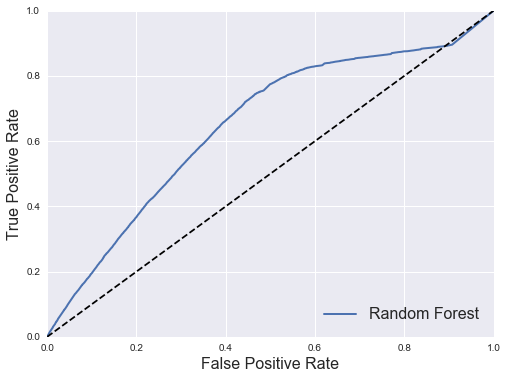

In [178]:
# 3. plot the roc_curve
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

#### 4.3. Tuning hyperparameters using gridsearch

In [179]:
from sklearn.model_selection import RandomizedSearchCV
from time import time
from scipy.stats import randint as sp_randint


param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

forest_clf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(forest_clf, param_distributions = param_dist, cv=5, verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=9 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=9, score=0.776590, total=   0.9s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=9 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=9, score=0.773424, total=   0.9s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=9 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=9, score=0.778953, total=   1.1s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=9 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=9, score=0.776521, total=   0.9s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=9 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=9, score=0.776904, total=   0.9s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=5 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min_samples_split=5, score=0.797738, total=   0.3s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, min

[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=5, min_samples_split=3, score=0.784450, total=   0.5s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=5, min_samples_split=3 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=5, min_samples_split=3, score=0.782754, total=   0.5s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=5, min_samples_split=3 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=5, min_samples_split=3, score=0.783194, total=   0.5s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=5, min_samples_split=3 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=5, min_samples_split=3, score=0.784155, total=   0.5s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=5, min_samples_split

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   25.1s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11d0a3400>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11d0a3b70>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11d0a3048>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None,

In [180]:
random_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [181]:
random_search.best_score_

0.79776297485891356

In [182]:
from sklearn.metrics import accuracy_score

y_pred = random_search.predict(X_test)
accuracy_score(y_test, y_pred)              # very poor model

0.79928526191984073

#### 4.4 Naive Bayes Classifier

In [183]:
# 1. Build the Naive bayes model
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
y_probas_nb = cross_val_predict(nb_clf, X_train, y_train, cv=5,
                                    method="predict_proba")

In [184]:
from sklearn.model_selection import cross_val_score
cross_val_score(nb_clf , X_train, y_train, cv=10, scoring="accuracy") 

array([ 0.77745109,  0.77428474,  0.77957476,  0.78047953,  0.78081882,
        0.77968785,  0.78025334,  0.77527709,  0.78115811,  0.77762697])

In [185]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(nb_clf , X_train, y_train, cv=10)

In [186]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[67683,  2856],
       [16715,  1167]])

In [187]:
y_scores_nb = y_probas_nb[:, 1] # score = proba of positive class
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_train,y_scores_nb)

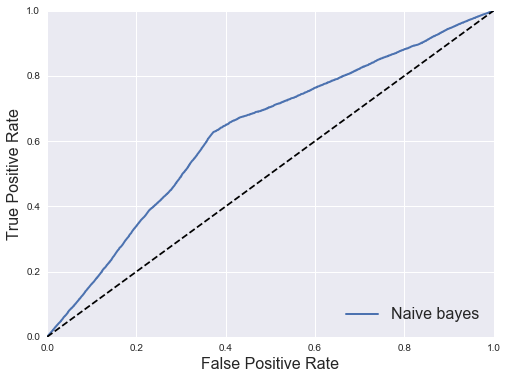

In [188]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_nb, tpr_nb, "Naive bayes")
plt.legend(loc="lower right", fontsize=16)
plt.show()

#### 4.5 SVM

In [189]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
#y_probas_svm = cross_val_predict(svm_clf, X_train, y_train, cv=5, method="predict_proba")

In [190]:
X_train2 = X_train.iloc[:100]
X_train2.shape

(100, 4)

In [ ]:
cross_val_score(svm_clf , X_train.iloc[:100], y_train[:100], cv=3, scoring="accuracy") 
# y_train_pred = cross_val_predict(svm_clf , X_train, y_train, cv=3)


In [ ]:
confusion_matrix(y_train, y_train_pred)
y_scores_svm = y_probas_svm[:, 1] # score = proba of positive class



In [ ]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train,y_scores_svm)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_svm, tpr_svm, "SVM")
plt.legend(loc="lower right", fontsize=16)
plt.show()